In [1]:
import ydata_profiling as yp
import pandas as pd

In [180]:
data = pd.read_csv("train.csv")

In [171]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [78]:
data = data.drop(["Cabin"],axis=1)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [79]:
data["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [80]:
data["Embarked"].isna().sum()

2

In [81]:
data["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [82]:
data["Embarked"] = data["Embarked"].fillna(str(data["Embarked"].mode()[0]))

In [84]:
data["Age"] = data["Age"].fillna(int(data["Age"].median()))

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [86]:
newReport = yp.ProfileReport(data,minimal=False)
newReportJson = newReport.get_description()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

In [89]:
data.corr()["Survived"]

/tmp/ipykernel_10481/1820820231.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()["Survived"]


PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.064910
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

In [90]:
newReportJson["correlations"]["auto"]["Survived"]

PassengerId    0.104397
Age            0.157934
SibSp          0.187428
Parch          0.156934
Fare           0.283219
Survived       1.000000
Pclass         0.336684
Sex            0.540200
Embarked       0.164085
Name: Survived, dtype: float64

In [96]:
(newReportJson["correlations"]["auto"]["Survived"]>0.95).sum()

1

In [97]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [98]:
data = data.drop(["Name","Ticket"],axis=1)
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,28.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [99]:
data = data.drop(["PassengerId"],axis=1)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [100]:
{"S":1,"C":2,"Q":3}

{'S': 1, 'C': 2, 'Q': 3}

In [101]:
{"male":0,"female":1}

{'male': 0, 'female': 1}

In [113]:
def mapper(x):
    if x == "male":
        return 0
    else:
        return 1

In [117]:
data["Sex"] = data["Sex"].apply(mapper)

In [172]:
data['Sex']=data['Sex'].apply(lambda x:0 if x=="male" else 1)

In [169]:
data["Sex"]

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [119]:
def mapperEmbarked(x):
    if x == "S":
        return 1
    elif x == "c":
        return 2
    else:
        return 3

In [120]:
data["Embarked"] = data["Embarked"].apply(mapperEmbarked)

In [121]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,3
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,1
887,1,1,1,19.0,0,0,30.0000,1
888,0,3,1,28.0,1,2,23.4500,1
889,1,1,0,26.0,0,0,30.0000,3


In [122]:
data[data["Age"] == 25]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
75,0,3,0,25.0,0,0,7.6500,1
134,0,2,0,25.0,0,0,13.0000,1
246,0,3,1,25.0,0,0,7.7750,1
267,1,3,0,25.0,1,0,7.7750,1
271,1,3,0,25.0,0,0,0.0000,1
343,0,2,0,25.0,0,0,13.0000,1
353,0,3,0,25.0,1,0,17.8000,1
370,1,1,0,25.0,1,0,55.4417,3
442,0,3,0,25.0,1,0,7.7750,1
484,1,1,0,25.0,1,0,91.0792,3


In [150]:
import numpy as np

In [151]:
np.array((data["Age"] == 25)) and np.array((data["Embarked"]==1))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
| bitwise or
& bitwise and
&& and

In [175]:
data["Embarked"] == 1

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

In [177]:
data[(data["Age"]==25)|(data["Embarked"]==1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
75,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,F G73,S
134,135,0,2,"Sobey, Mr. Samuel James Hayden",0,25.0,0,0,C.A. 29178,13.0000,NaN,S
246,247,0,3,"Lindahl, Miss. Agda Thorilda Viktoria",1,25.0,0,0,347071,7.7750,NaN,S
267,268,1,3,"Persson, Mr. Ernst Ulrik",0,25.0,1,0,347083,7.7750,NaN,S
271,272,1,3,"Tornquist, Mr. William Henry",0,25.0,0,0,LINE,0.0000,NaN,S
343,344,0,2,"Sedgwick, Mr. Charles Frederick Waddington",0,25.0,0,0,244361,13.0000,NaN,S
353,354,0,3,"Arnold-Franchi, Mr. Josef",0,25.0,1,0,349237,17.8000,NaN,S
370,371,1,1,"Harder, Mr. George Achilles",0,25.0,1,0,11765,55.4417,E50,C
442,443,0,3,"Petterson, Mr. Johan Emil",0,25.0,1,0,347076,7.7750,NaN,S
484,485,1,1,"Bishop, Mr. Dickinson H",0,25.0,1,0,11967,91.0792,B49,C


In [165]:
help(data.set_index)

Help on method set_index in module pandas.core.frame:

set_index(keys, *, drop: 'bool' = True, append: 'bool' = False, inplace: 'bool' = False, verify_integrity: 'bool' = False) -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Set the DataFrame index using existing columns.
    
    Set the DataFrame index (row labels) using one or more existing
    columns or arrays (of the correct length). The index can replace the
    existing index or expand on it.
    
    Parameters
    ----------
    keys : label or array-like or list of labels/arrays
        This parameter can be either a single column key, a single array of
        the same length as the calling DataFrame, or a list containing an
        arbitrary combination of column keys and arrays. Here, "array"
        encompasses :class:`Series`, :class:`Index`, ``np.ndarray``, and
        instances of :class:`~collections.abc.Iterator`.
    drop : bool, default True
        Delete columns to be used as the new in

In [167]:
data.sort_values(by=["Age"])

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
803,1,3,0,0.42,0,1,8.5167,3
755,1,2,0,0.67,1,1,14.5000,1
644,1,3,1,0.75,2,1,19.2583,3
469,1,3,1,0.75,2,1,19.2583,3
831,1,2,0,0.83,1,1,18.7500,1
...,...,...,...,...,...,...,...,...
116,0,3,0,70.50,0,0,7.7500,3
96,0,1,0,71.00,0,0,34.6542,3
493,0,1,0,71.00,0,0,49.5042,3
851,0,3,0,74.00,0,0,7.7750,1


In [161]:
help(data.set_index)

Help on method set_index in module pandas.core.frame:

set_index(keys, *, drop: 'bool' = True, append: 'bool' = False, inplace: 'bool' = False, verify_integrity: 'bool' = False) -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Set the DataFrame index using existing columns.
    
    Set the DataFrame index (row labels) using one or more existing
    columns or arrays (of the correct length). The index can replace the
    existing index or expand on it.
    
    Parameters
    ----------
    keys : label or array-like or list of labels/arrays
        This parameter can be either a single column key, a single array of
        the same length as the calling DataFrame, or a list containing an
        arbitrary combination of column keys and arrays. Here, "array"
        encompasses :class:`Series`, :class:`Index`, ``np.ndarray``, and
        instances of :class:`~collections.abc.Iterator`.
    drop : bool, default True
        Delete columns to be used as the new in

In [10]:
reportJson["analysis"]

{'title': 'Pandas Profiling Report',
 'date_start': datetime.datetime(2023, 3, 18, 2, 39, 33, 488510),
 'date_end': datetime.datetime(2023, 3, 18, 2, 39, 42, 125185),
 'duration': datetime.timedelta(seconds=8, microseconds=636675)}

In [16]:
reportJson["correlations"].keys()

dict_keys(['auto'])

In [17]:
reportJson["correlations"]["auto"]

,PassengerId,Age,SibSp,Parch,Fare,Survived,Pclass,Sex,Embarked
PassengerId,1.000000,0.041010,-0.061161,0.001235,-0.013975,0.104397,0.032079,0.065861,0.000000
Age,0.041010,1.000000,-0.182061,-0.254212,0.135051,0.154960,0.268620,0.099464,0.064893
SibSp,-0.061161,-0.182061,1.000000,0.450014,0.447113,0.187428,0.147816,0.205915,0.091940
Parch,0.001235,-0.254212,0.450014,1.000000,0.410074,0.156934,0.021952,0.247110,0.051774
Fare,-0.013975,0.135051,0.447113,0.410074,1.000000,0.283219,0.479007,0.188591,0.195798
Survived,0.104397,0.154960,0.187428,0.156934,0.283219,1.000000,0.336684,0.540200,0.166058
Pclass,0.032079,0.268620,0.147816,0.021952,0.479007,0.336684,1.000000,0.129690,0.259811
Sex,0.065861,0.099464,0.205915,0.247110,0.188591,0.540200,0.129690,1.000000,0.113072
Embarked,0.000000,0.064893,0.091940,0.051774,0.195798,0.166058,0.259811,0.113072,1.000000


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
## FILLING Null values ---> 
"""
1. Categorize the type
2. Central Tendency of the data
3. Inspect whether the central tendency is a good fit for filling null values
4. Check Domain experts, whether there are any default values -- 0, 1, 
"""

In [33]:
int(data["Age"].median())

24

In [45]:
mean = data["Age"].sum()/len(data["Age"])
mean

29.36158249158249

In [47]:
mean=data["Age"].mean()
q2=data["Age"].median()
q3=data["Age"].max()
q1=data["Age"].min()
mode=data["Age"].mode()

In [48]:
mode

0    28.0
Name: Age, dtype: float64

In [42]:
data["Age"].isna().sum()

0

In [39]:
data["Age"] = data["Age"].fillna(int(data["Age"].median()))

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [50]:
data["Cabin"].isna().sum()

687

In [55]:
len(data["Cabin"].unique())

148

In [59]:
data["Cabin"].mode()[0]

'B96 B98'

In [61]:
data["Cabin"]

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [60]:
new_category = "GENERAL"

In [ ]:
##Categorical
"""
----> Non Important Nominal Attribute
"""

In [38]:
reportJson["correlations"]["auto"]["Survived"]

PassengerId    0.104397
Age            0.154960
SibSp          0.187428
Parch          0.156934
Fare           0.283219
Survived       1.000000
Pclass         0.336684
Sex            0.540200
Embarked       0.166058
Name: Survived, dtype: float64

In [20]:
reportJson["correlations"]["auto"]["Survived"]

1.0

In [11]:
reportJson["table"]

{'n': 891,
 'n_var': 12,
 'memory_size': 85664,
 'record_size': 96.14365881032548,
 'n_cells_missing': 866,
 'n_vars_with_missing': 3,
 'n_vars_all_missing': 0,
 'p_cells_missing': 0.08099513655069211,
 'types': {'Numeric': 5, 'Categorical': 7},
 'n_duplicates': 0,
 'p_duplicates': 0.0}

In [10]:
total_number_of_cells = reportJson["table"]["n"]*reportJson["table"]["n_var"]

In [11]:
total_number_of_cells

10692

In [12]:
reportJson["table"]["types"]["Numeric"]

7

In [13]:
reportJson["table"]["types"]["Categorical"]

5

In [14]:
reportJson["variables"].keys()

dict_keys(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'])

In [15]:
variables = reportJson["variables"]
variables

{'PassengerId': {'n_distinct': 891,
  'p_distinct': 1.0,
  'is_unique': True,
  'n_unique': 891,
  'p_unique': 1.0,
  'type': 'Numeric',
  'hashable': True,
  'value_counts_without_nan': 1      1
  599    1
  588    1
  589    1
  590    1
        ..
  301    1
  302    1
  303    1
  304    1
  891    1
  Name: PassengerId, Length: 891, dtype: int64,
  'value_counts_index_sorted': 1      1
  2      1
  3      1
  4      1
  5      1
        ..
  887    1
  888    1
  889    1
  890    1
  891    1
  Name: PassengerId, Length: 891, dtype: int64,
  'ordering': True,
  'n_missing': 0,
  'n': 891,
  'p_missing': 0.0,
  'count': 891,
  'memory_size': 7256,
  'n_negative': 0,
  'p_negative': 0.0,
  'n_infinite': 0,
  'n_zeros': 0,
  'mean': 446.0,
  'std': 257.3538420152301,
  'variance': 66231.0,
  'min': 1,
  'max': 891,
  'kurtosis': -1.1999999999999997,
  'skewness': 0.0,
  'sum': 397386,
  'mad': 223.0,
  'range': 890,
  '5%': 45.5,
  '25%': 223.5,
  '50%': 446.0,
  '75%': 668.5,
  '95

In [16]:
variables.keys()

dict_keys(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'])

In [17]:
dic = {}
for k,v in reportJson["variables"].items():
    if v["type"] == "Numeric":
        dic[k] = v

In [18]:
dic.keys()

dict_keys(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])

In [19]:
catDic = {}
for k,v in variables.items():
    if v["type"] == "Categorical":
        catDic[k] = v

In [20]:
catDicIn = {k:v for k,v in variables.items() if v["type"]=="Categorical"}

In [21]:
catDicIn.keys()

dict_keys(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'])

In [22]:
catDic.keys()

dict_keys(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'])

In [23]:
sample = {"name":"Tharun","age":25}

In [24]:
list(sample.items())[0]

('name', 'Tharun')

In [25]:
num_features = list({k:v for k,v in reportJson["variables"].items() if v["type"] == "Numeric"}.keys())
num_features

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [26]:
cat_features = list({k:v for k,v in reportJson["variables"].items() if v["type"] == "Categorical"}.keys())
cat_features

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [27]:
list(variables.items())[0]

('PassengerId',
 {'n_distinct': 891,
  'p_distinct': 1.0,
  'is_unique': True,
  'n_unique': 891,
  'p_unique': 1.0,
  'type': 'Numeric',
  'hashable': True,
  'value_counts_without_nan': 1      1
  599    1
  588    1
  589    1
  590    1
        ..
  301    1
  302    1
  303    1
  304    1
  891    1
  Name: PassengerId, Length: 891, dtype: int64,
  'value_counts_index_sorted': 1      1
  2      1
  3      1
  4      1
  5      1
        ..
  887    1
  888    1
  889    1
  890    1
  891    1
  Name: PassengerId, Length: 891, dtype: int64,
  'ordering': True,
  'n_missing': 0,
  'n': 891,
  'p_missing': 0.0,
  'count': 891,
  'memory_size': 7256,
  'n_negative': 0,
  'p_negative': 0.0,
  'n_infinite': 0,
  'n_zeros': 0,
  'mean': 446.0,
  'std': 257.3538420152301,
  'variance': 66231.0,
  'min': 1,
  'max': 891,
  'kurtosis': -1.1999999999999997,
  'skewness': 0.0,
  'sum': 397386,
  'mad': 223.0,
  'range': 890,
  '5%': 45.5,
  '25%': 223.5,
  '50%': 446.0,
  '75%': 668.5,
  '9

In [28]:
dic

{'PassengerId': {'n_distinct': 891,
  'p_distinct': 1.0,
  'is_unique': True,
  'n_unique': 891,
  'p_unique': 1.0,
  'type': 'Numeric',
  'hashable': True,
  'value_counts_without_nan': 1      1
  599    1
  588    1
  589    1
  590    1
        ..
  301    1
  302    1
  303    1
  304    1
  891    1
  Name: PassengerId, Length: 891, dtype: int64,
  'value_counts_index_sorted': 1      1
  2      1
  3      1
  4      1
  5      1
        ..
  887    1
  888    1
  889    1
  890    1
  891    1
  Name: PassengerId, Length: 891, dtype: int64,
  'ordering': True,
  'n_missing': 0,
  'n': 891,
  'p_missing': 0.0,
  'count': 891,
  'memory_size': 7256,
  'n_negative': 0,
  'p_negative': 0.0,
  'n_infinite': 0,
  'n_zeros': 0,
  'mean': 446.0,
  'std': 257.3538420152301,
  'variance': 66231.0,
  'min': 1,
  'max': 891,
  'kurtosis': -1.1999999999999997,
  'skewness': 0.0,
  'sum': 397386,
  'mad': 223.0,
  'range': 890,
  '5%': 45.5,
  '25%': 223.5,
  '50%': 446.0,
  '75%': 668.5,
  '95

In [29]:
{k:v for k,v in reportJson["variables"].items() if v["type"] == "Numeric"}

{'PassengerId': {'n_distinct': 891,
  'p_distinct': 1.0,
  'is_unique': True,
  'n_unique': 891,
  'p_unique': 1.0,
  'type': 'Numeric',
  'hashable': True,
  'value_counts_without_nan': 1      1
  599    1
  588    1
  589    1
  590    1
        ..
  301    1
  302    1
  303    1
  304    1
  891    1
  Name: PassengerId, Length: 891, dtype: int64,
  'value_counts_index_sorted': 1      1
  2      1
  3      1
  4      1
  5      1
        ..
  887    1
  888    1
  889    1
  890    1
  891    1
  Name: PassengerId, Length: 891, dtype: int64,
  'ordering': True,
  'n_missing': 0,
  'n': 891,
  'p_missing': 0.0,
  'count': 891,
  'memory_size': 7256,
  'n_negative': 0,
  'p_negative': 0.0,
  'n_infinite': 0,
  'n_zeros': 0,
  'mean': 446.0,
  'std': 257.3538420152301,
  'variance': 66231.0,
  'min': 1,
  'max': 891,
  'kurtosis': -1.1999999999999997,
  'skewness': 0.0,
  'sum': 397386,
  'mad': 223.0,
  'range': 890,
  '5%': 45.5,
  '25%': 223.5,
  '50%': 446.0,
  '75%': 668.5,
  '95

In [30]:
variables[cat_features[0]]["n_distinct"] >= 2

True

In [31]:
cat_features

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [32]:
def mapCategory(feature,reportJson):
    if feature["n_distinct"] == 1:
        return "Unary"
    elif feature["n_distinct"] == 2:
        return "Binary"
    else:
        return "Nominal"

In [33]:
category_features = map(mapCategory,var)

NameError: name 'var' is not defined

In [34]:
list(category_features)

NameError: name 'category_features' is not defined

In [35]:
variables.keys()

dict_keys(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'])

In [36]:
unary_features = []
binary_features = []
nominal_features = []
for feature in cat_features:
    if variables[feature]["n_distinct"] == 1:
        unary_features.append(feature)
    elif variables[feature]["n_distinct"] == 2:
        binary_features.append(feature)
    else:
        nominal_features.append(feature)

In [37]:
unary_features

[]

In [38]:
binary_features

['Sex']

In [39]:
variables[feature]

{'n_distinct': 3,
 'p_distinct': 0.003374578177727784,
 'is_unique': False,
 'n_unique': 0,
 'p_unique': 0.0,
 'type': 'Categorical',
 'hashable': True,
 'value_counts_without_nan': S    644
 C    168
 Q     77
 Name: Embarked, dtype: int64,
 'value_counts_index_sorted': C    168
 Q     77
 S    644
 Name: Embarked, dtype: int64,
 'ordering': True,
 'n_missing': 2,
 'n': 891,
 'p_missing': 0.002244668911335578,
 'count': 889,
 'memory_size': 7256,
 'imbalance': 0.3079524913516015,
 'first_rows': 0    S
 1    C
 2    S
 3    S
 4    S
 Name: Embarked, dtype: object}

In [40]:
nominal_features

['Name', 'Ticket', 'Cabin', 'Embarked']

In [41]:
no_examples = reportJson["table"]["n"]
nominal_features_imp = []
nominal_features_nonimp = []
for feature in nominal_features:
    if variables[feature]["n_distinct"] == no_examples:
        nominal_features_nonimp.append(feature)
    elif variables[feature]["n_distinct"] >= (no_examples*0.5):
        nominal_features_nonimp.append(feature)
    else:
        nominal_features_imp.append(feature)

In [42]:
nominal_features_nonimp

['Name', 'Ticket']

In [43]:
type(variables)

dict

In [44]:
var = []
for _,v in variables.items():
    var.append(v)

In [45]:
nominal_features_imp

['Cabin', 'Embarked']

In [46]:
num_features

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [47]:
reportJson.keys()

dict_keys(['analysis', 'table', 'variables', 'scatter', 'correlations', 'missing', 'alerts', 'package', 'sample', 'duplicates'])

In [48]:
reportJson["missing"]

{}

In [54]:
reportJson["alerts"]

[[HIGH_CARDINALITY] alert on column Name,
 [HIGH_CARDINALITY] alert on column Ticket,
 [HIGH_CARDINALITY] alert on column Cabin,
 [MISSING] alert on column Age,
 [MISSING] alert on column Cabin,
 [UNIQUE] alert on column PassengerId,
 [UNIQUE] alert on column Name,
 [ZEROS] alert on column Survived,
 [ZEROS] alert on column SibSp,
 [ZEROS] alert on column Parch,
 [ZEROS] alert on column Fare]

In [55]:
temp = "[HIGH_CARDINALITY] alert on column Name"
temp_split = temp.split(" ")
temp_split

['[HIGH_CARDINALITY]', 'alert', 'on', 'column', 'Name']

In [ ]:
"""
[CONSTANT] ---> Everything 
[UNSUPPORTED] --->
[UNIFORM] ---> 
[HIGH_CARDINALITY] --->
[MISSING]
[IMBALANCED]
"""

In [71]:
def zero_feature(feature):
    return str(feature).split(" ")[-1]

In [74]:
zero_alerts = list(filter(lambda x:str(x).split(" ")[0] == "[ZEROS]", reportJson["alerts"]))
zero_features = list(map(lambda x:str(x).split(" ")[-1],zero_alerts))
constant_alerts = list(filter(lambda x:str(x).split(" ")[0] == "[CONSTANT]", reportJson["alerts"]))
constant_features = list(map(lambda x:str(x).split(" ")[-1],zero_alerts))
nonimpnominal_alerts = list(filter(lambda x:str(x).split(" ")[0] == "[HIGH_CARDINALITY]", reportJson["alerts"]))
nonimpnominal_features = list(map(lambda x:str(x).split(" ")[-1],zero_alerts))
missing_alerts = list(filter(lambda x:str(x).split(" ")[0] == "[MISSING]", reportJson["alerts"]))
missing_features = list(map(lambda x:str(x).split(" ")[-1],zero_alerts))
uniform_alerts = list(filter(lambda x:str(x).split(" ")[0] == "[UNIFORM]", reportJson["alerts"]))
uniform_features = list(map(lambda x:str(x).split(" ")[-1],zero_alerts))

In [72]:
zero_features = list(filter(zero_feature,zero_alerts))
zero_features

[[ZEROS] alert on column Survived,
 [ZEROS] alert on column SibSp,
 [ZEROS] alert on column Parch,
 [ZEROS] alert on column Fare]

In [52]:
len(data["Cabin"].unique())

148

In [ ]:
## BY Default Ydata will take categorical threshold as 100

In [77]:
excel = pd.ExcelWriter("file.xlsx")

In [78]:
zero_features

['Survived', 'SibSp', 'Parch', 'Fare']

In [87]:
dic_df = {}
dic_df["Feature"] = zero_features
df = pd.DataFrame(dic_df)

In [88]:
df

,Feature
0,Survived
1,SibSp
2,Parch
3,Fare


In [83]:
df.to_excel(excel,sheet_name="ZeroFeatures")

In [ ]:
dic_df1 = {}
dic_df1["Feature"] = mis

In [89]:
excel.close()

ValueError: I/O operation on closed file

In [184]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [181]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Help on AxesSubplot in module matplotlib.axes._subplots object:

class AxesSubplot(SubplotBase, matplotlib.axes._axes.Axes)
 |  AxesSubplot(fig, *args, **kwargs)
 |  
 |  Base class for subplots, which are :class:`Axes` instances with
 |  additional methods to facilitate generating and manipulating a set
 |  of :class:`Axes` within a figure.
 |  
 |  Method resolution order:
 |      AxesSubplot
 |      SubplotBase
 |      matplotlib.axes._axes.Axes
 |      matplotlib.axes._base._AxesBase
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __reduce__(self)
 |  
 |  set(self, *, adjustable=<UNSET>, agg_filter=<UNSET>, alpha=<UNSET>, anchor=<UNSET>, animated=<UNSET>, aspect=<UNSET>, autoscale_on=<UNSET>, autoscalex_on=<UNSET>, autoscaley_on=<UNSET>, axes_locator=<UNSET>, axisbelow=<UNSET>, box_aspect=<UNSET>, clip_box=<UNSET>, clip_on=<UNSET>, clip_path=<UNSET>, facecolor=<UNSET>, frame_on=<UNSET>, gid=<UNSET>, in_layout=<UNSET>, label=<UNSET>,

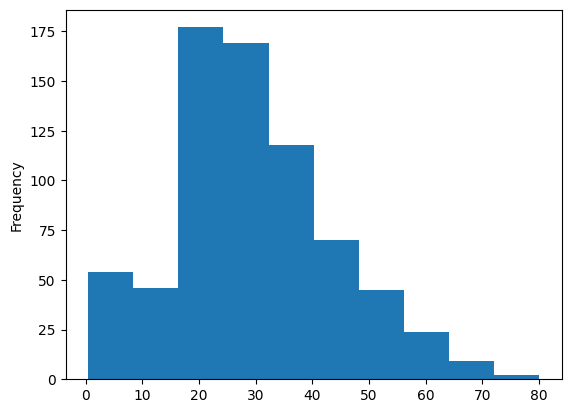

In [190]:
help(data["Age"].plot(kind="hist"))

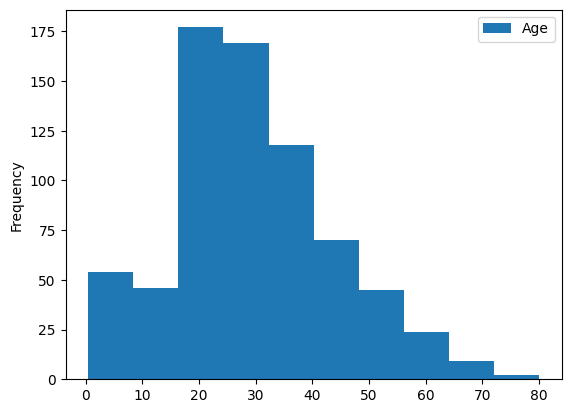

In [198]:
data["Age"].plot(kind="hist")
plt.legend()

<AxesSubplot: ylabel='Density'>

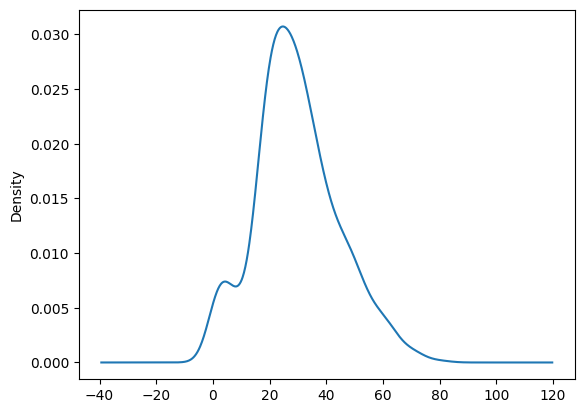

In [189]:
data["Age"].plot(kind="kde")

In [202]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot: xlabel='Age', ylabel='Fare'>

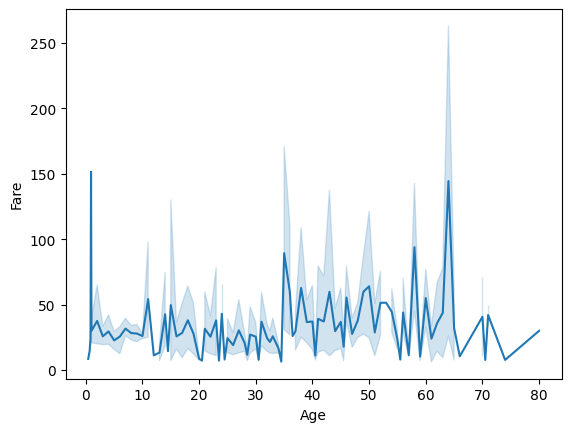

In [205]:
sns.lineplot(x="Age",y="Fare",data=data)

In [208]:
help(sns.histplot)

Help on function histplot in module seaborn.distributions:

histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)
    Plot univariate or bivariate histograms to show distributions of datasets.
    
    A histogram is a classic visualization tool that represents the distribution
    of one or more variables by counting the number of observations that fall within
    discrete bins.
    
    This function can normalize the statistic computed within each bin to estimate
    frequency, density or probability mass, and it can add a smooth curve obtained
    using a kernel density estimate

<AxesSubplot: xlabel='Pclass', ylabel='Count'>

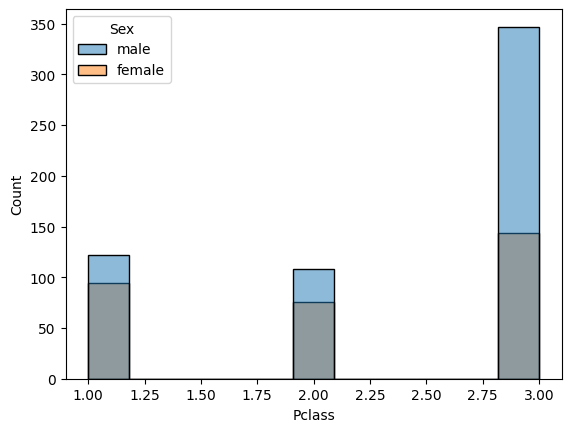

In [218]:
sns.histplot(x="Pclass",data=data,hue="Sex")

<AxesSubplot: xlabel='Pclass', ylabel='Count'>

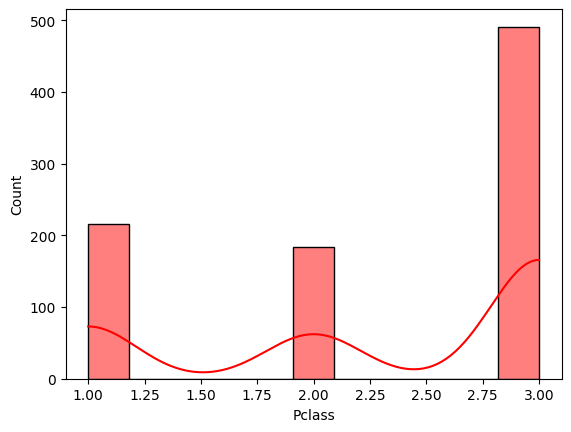

In [231]:
sns.histplot(x="Pclass",data=data,color="red",legend=True,kde=True)

<AxesSubplot: xlabel='Survived', ylabel='Fare'>

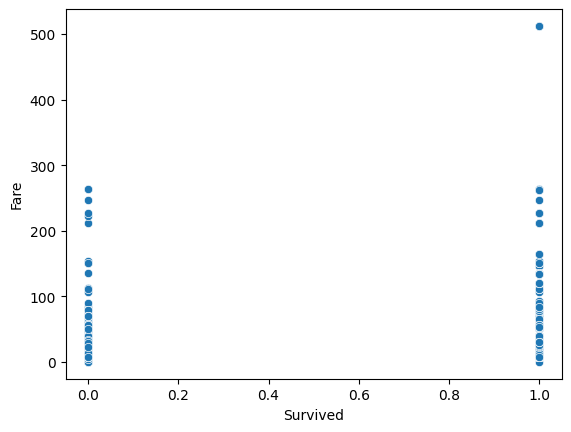

In [241]:
sns.scatterplot(x=data["Survived"],y=data["Fare"])

In [221]:
help(sns.histplot)

Help on function histplot in module seaborn.distributions:

histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)
    Plot univariate or bivariate histograms to show distributions of datasets.
    
    A histogram is a classic visualization tool that represents the distribution
    of one or more variables by counting the number of observations that fall within
    discrete bins.
    
    This function can normalize the statistic computed within each bin to estimate
    frequency, density or probability mass, and it can add a smooth curve obtained
    using a kernel density estimate